In [1]:
print('hi')

hi


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_278/912317896.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tokens = pd.read_sql("SELECT DISTINCT token FROM sma_signals", conn)['token'].tolist()
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_278/912317896.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_278/912317896.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signals = pd.read_sql(f"""
/var/folders/5s

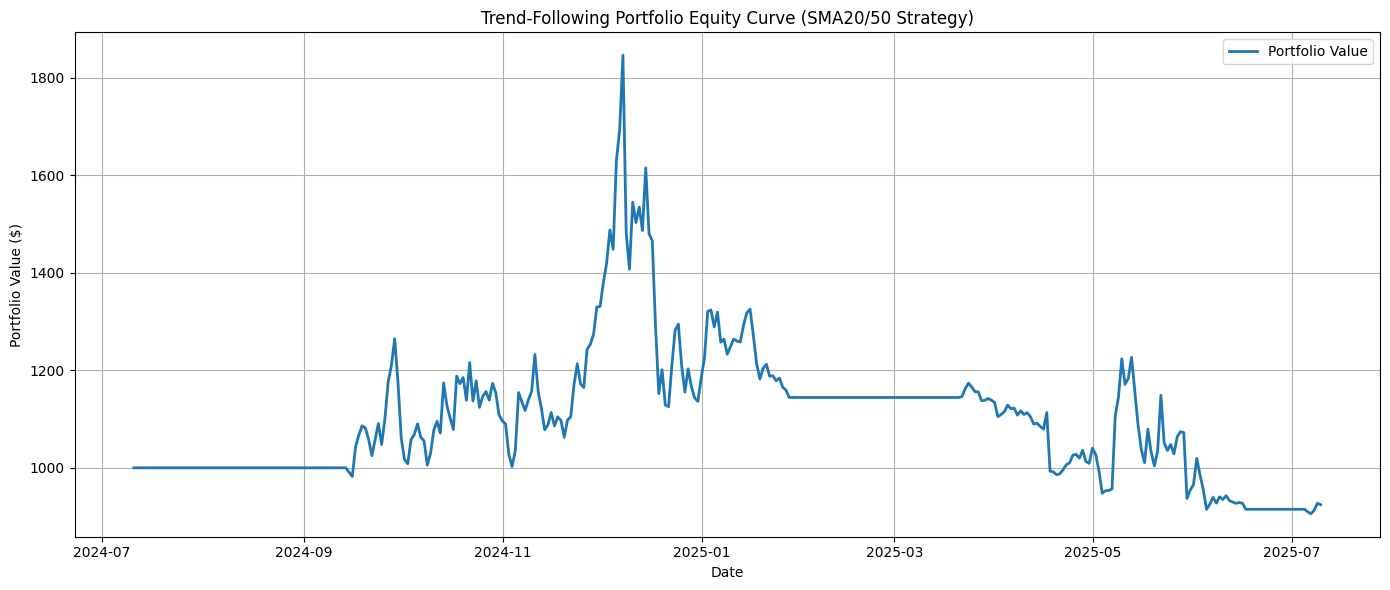

📈 Final Token Values:
MERL_USDT: $111.62
BIGTIME_USDT: $141.31
AIDOGE_USDT: $59.04
VELO_USDT: $222.42
SUSHI_USDT: $390.03

💰 Final Portfolio Value: $924.41


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from datetime import timedelta

# DB connection
conn = psycopg2.connect(
    dbname="crypto_index",
    user="postgres",
    password="postgres",  # Update if needed
    host="localhost",
    port=5432
)

# Get tokens from sma_signals
tokens = pd.read_sql("SELECT DISTINCT token FROM sma_signals", conn)['token'].tolist()

# Capital settings
initial_capital = 1000
capital_per_token = initial_capital / len(tokens)

# Store final value per token
token_results = {}

# For plotting
portfolio_curve = pd.DataFrame()

for token in tokens:
    # Load price data
    df = pd.read_sql(f"""
        SELECT timestamp, close
        FROM ohlcv_data
        WHERE token = '{token}'
        ORDER BY timestamp
    """, conn)

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # Load signals
    signals = pd.read_sql(f"""
        SELECT timestamp, signal
        FROM sma_signals
        WHERE token = '{token}'
        ORDER BY timestamp
    """, conn)
    signals['timestamp'] = pd.to_datetime(signals['timestamp'])

    # Track position & equity
    in_position = False
    entry_price = 0
    cash = capital_per_token
    token_holding = 0
    equity_curve = []

    for current_time in df.index:
        price = df.loc[current_time, 'close']

        # If there’s a signal today, update position
        signal_today = signals[signals['timestamp'] == current_time]
        if not signal_today.empty:
            signal = signal_today['signal'].values[0]

            if signal == 'bullish_crossover' and not in_position:
                # Buy
                token_holding = cash / price
                entry_price = price
                cash = 0
                in_position = True

            elif signal == 'bearish_crossover' and in_position:
                # Sell
                cash = token_holding * price
                token_holding = 0
                in_position = False

        # Mark-to-market portfolio value
        value = token_holding * price + cash
        equity_curve.append((current_time, value))

    # Final value
    final_value = equity_curve[-1][1]
    token_results[token] = final_value

    # Store equity curve for plotting
    token_df = pd.DataFrame(equity_curve, columns=['timestamp', token])
    token_df.set_index('timestamp', inplace=True)

    if portfolio_curve.empty:
        portfolio_curve = token_df
    else:
        portfolio_curve = portfolio_curve.join(token_df, how='outer')

# Fill forward missing values
portfolio_curve.fillna(method='ffill', inplace=True)

# Compute total portfolio value over time
portfolio_curve['Total'] = portfolio_curve.sum(axis=1)

# Plot equity curve
plt.figure(figsize=(14, 6))
plt.plot(portfolio_curve.index, portfolio_curve['Total'], label='Portfolio Value', linewidth=2)
plt.title("Trend-Following Portfolio Equity Curve (SMA20/50 Strategy)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Show final results
print("📈 Final Token Values:")
for token, value in token_results.items():
    print(f"{token}: ${value:.2f}")

print(f"\n💰 Final Portfolio Value: ${sum(token_results.values()):.2f}")


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  strategies = pd.read_sql("SELECT DISTINCT strategy_name FROM sma_signals", conn)['strategy_name'].tolist()
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tokens = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.r


🧪 Backtesting strategy: sma50_100


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signals = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:95: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_curve.fillna(method='ffill', inplace=True)


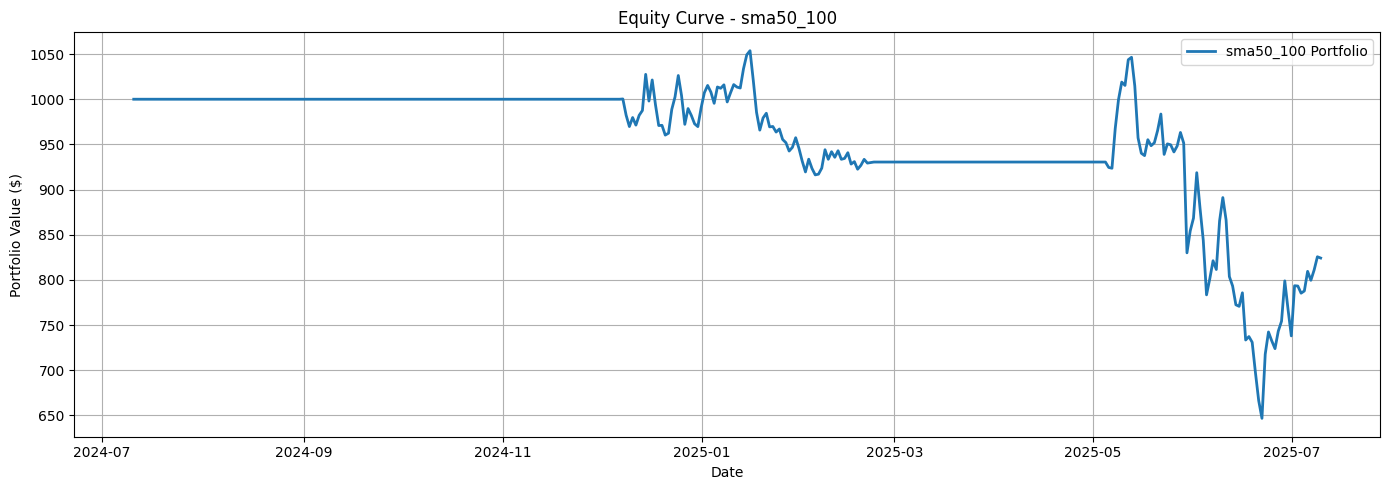

📈 Final Token Values:
AIDOGE_USDT: $176.73
BIGTIME_USDT: $144.96
MERL_USDT: $181.55
SUSHI_USDT: $184.81
VELO_USDT: $136.17

💰 Final Portfolio Value: $824.22

🧪 Backtesting strategy: sma20_50


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tokens = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signals = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/30

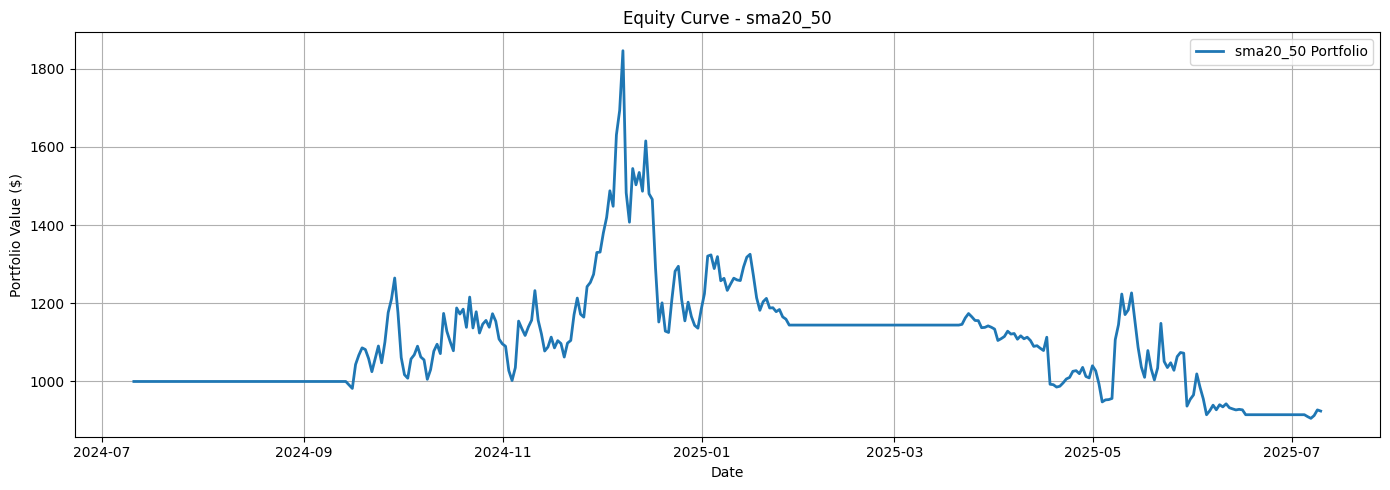

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tokens = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signals = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/30

📈 Final Token Values:
AIDOGE_USDT: $59.04
BIGTIME_USDT: $141.31
MERL_USDT: $111.62
SUSHI_USDT: $390.03
VELO_USDT: $222.42

💰 Final Portfolio Value: $924.41

🧪 Backtesting strategy: sma25_100


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signals = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3018049307.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signals = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_37533/3

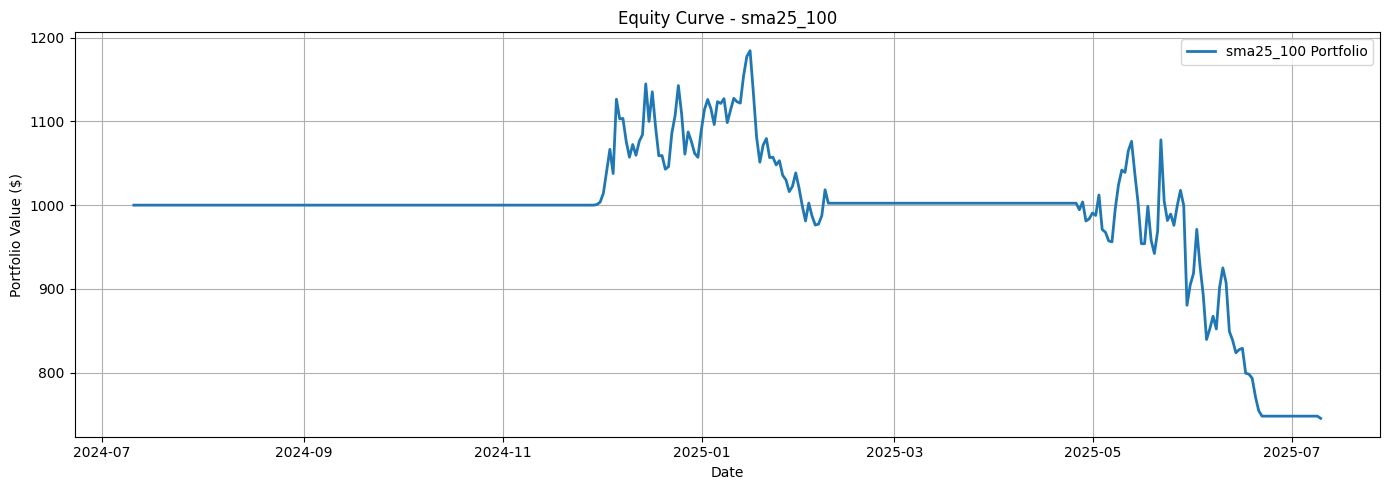

📈 Final Token Values:
AIDOGE_USDT: $129.37
BIGTIME_USDT: $135.33
MERL_USDT: $136.59
SUSHI_USDT: $144.42
VELO_USDT: $199.68

💰 Final Portfolio Value: $745.38


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from collections import defaultdict

# DB connection
conn = psycopg2.connect(
    dbname="crypto_index",
    user="postgres",
    password="postgres",
    host="localhost",
    port=5432
)

# Get all strategy names
strategies = pd.read_sql("SELECT DISTINCT strategy_name FROM sma_signals", conn)['strategy_name'].tolist()

# Capital settings
initial_capital = 1000

# Results container
all_results = {}

for strategy in strategies:
    print(f"\n🧪 Backtesting strategy: {strategy}")
    # Get relevant tokens
    tokens = pd.read_sql(f"""
        SELECT DISTINCT token 
        FROM sma_signals 
        WHERE strategy_name = '{strategy}'
    """, conn)['token'].tolist()

    capital_per_token = initial_capital / len(tokens)
    token_results = {}
    portfolio_curve = pd.DataFrame()

    for token in tokens:
        # Load price data
        df = pd.read_sql(f"""
            SELECT timestamp, close
            FROM ohlcv_data
            WHERE token = '{token}'
            ORDER BY timestamp
        """, conn)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df.set_index('timestamp', inplace=True)

        # Load signals for this strategy
        signals = pd.read_sql(f"""
            SELECT timestamp, signal
            FROM sma_signals
            WHERE token = '{token}' AND strategy_name = '{strategy}'
            ORDER BY timestamp
        """, conn)
        signals['timestamp'] = pd.to_datetime(signals['timestamp'])

        # Simulate trading
        in_position = False
        cash = capital_per_token
        token_holding = 0
        equity_curve = []

        for current_time in df.index:
            price = df.loc[current_time, 'close']
            signal_today = signals[signals['timestamp'] == current_time]

            if not signal_today.empty:
                signal = signal_today['signal'].values[0]

                if signal == 'bullish_crossover' and not in_position:
                    token_holding = cash / price
                    cash = 0
                    in_position = True

                elif signal == 'bearish_crossover' and in_position:
                    cash = token_holding * price
                    token_holding = 0
                    in_position = False

            value = token_holding * price + cash
            equity_curve.append((current_time, value))

        final_value = equity_curve[-1][1]
        token_results[token] = final_value

        # Build per-token equity
        token_df = pd.DataFrame(equity_curve, columns=['timestamp', token])
        token_df.set_index('timestamp', inplace=True)

        if portfolio_curve.empty:
            portfolio_curve = token_df
        else:
            portfolio_curve = portfolio_curve.join(token_df, how='outer')

    portfolio_curve.fillna(method='ffill', inplace=True)
    portfolio_curve['Total'] = portfolio_curve.sum(axis=1)

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(portfolio_curve.index, portfolio_curve['Total'], label=f'{strategy} Portfolio', linewidth=2)
    plt.title(f"Equity Curve - {strategy}")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Store results
    print("📈 Final Token Values:")
    for token, value in token_results.items():
        print(f"{token}: ${value:.2f}")

    total = sum(token_results.values())
    print(f"\n💰 Final Portfolio Value: ${total:.2f}")
    all_results[strategy] = total
